In [183]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [192]:
!pip install prophet

  Using cached prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl (8.8 MB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [193]:
data = pd.read_csv("allcounts.csv")


In [194]:
data

,Unnamed: 0,Call Date,Call Number
0,0,2000-04-13,252
1,1,2000-04-14,319
2,2,2000-04-15,286
3,3,2000-04-16,303
4,4,2000-04-17,309
...,...,...,...
8630,8630,2023-12-01,532
8631,8631,2023-12-02,499
8632,8632,2023-12-03,473
8633,8633,2023-12-04,495


In [195]:
df = data.copy()[["Call Date", "Call Number"]]
df

,Call Date,Call Number
0,2000-04-13,252
1,2000-04-14,319
2,2000-04-15,286
3,2000-04-16,303
4,2000-04-17,309
...,...,...
8630,2023-12-01,532
8631,2023-12-02,499
8632,2023-12-03,473
8633,2023-12-04,495


In [196]:
import pandas as pd
from prophet import Prophet

In [212]:
train, test = df.iloc[:7600], df.iloc[7600:]
train

,Call Date,Call Number
0,2000-04-13,252
1,2000-04-14,319
2,2000-04-15,286
3,2000-04-16,303
4,2000-04-17,309
...,...,...
7595,2021-01-30,421
7596,2021-01-31,361
7597,2021-02-01,441
7598,2021-02-02,391


In [213]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [218]:
#m = Prophet(interval_width = 0.2, weekly_seasonality = 7, yearly_seasonality = 20)
m = Prophet(holidays = lockdowns, interval_width = 0.8, weekly_seasonality = 7, yearly_seasonality = 20)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='US')
p_data = train[["Call Date", "Call Number"]]
p_data = p_data.rename(columns = {"Call Date": "ds", "Call Number": "y"})
m.fit(p_data)

20:27:50 - cmdstanpy - INFO - Chain [1] start processing
20:28:01 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
future = m.make_future_dataframe(periods=2000)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
9595,2026-07-23,406.834382,344.062001,465.158988
9596,2026-07-24,417.182253,349.777277,477.675939
9597,2026-07-25,414.277955,354.419290,474.789201
9598,2026-07-26,401.411078,341.125158,459.052242
9599,2026-07-27,402.332319,338.001368,458.747638


/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


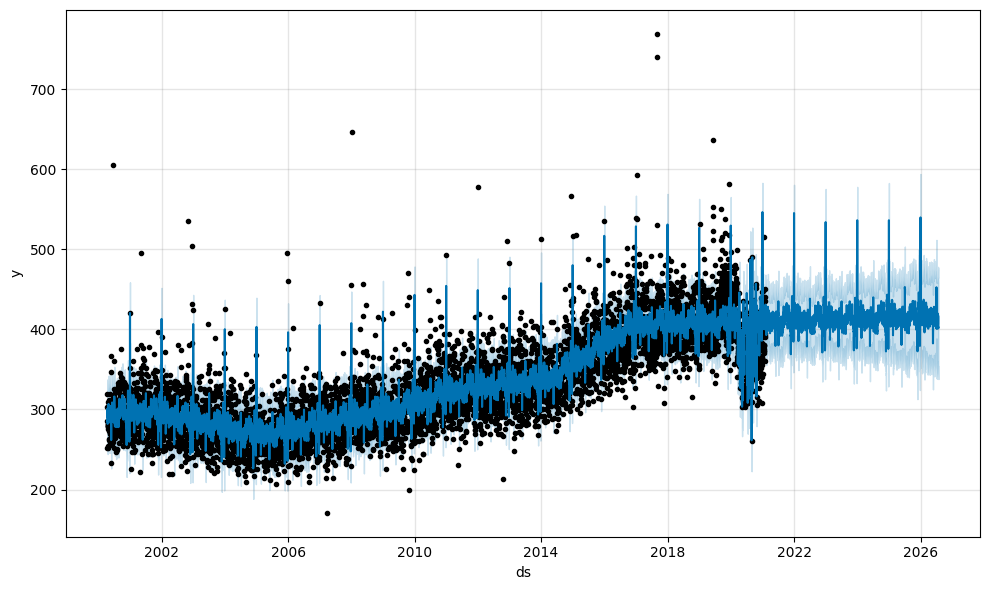

In [220]:
fig1 = m.plot(forecast)


/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

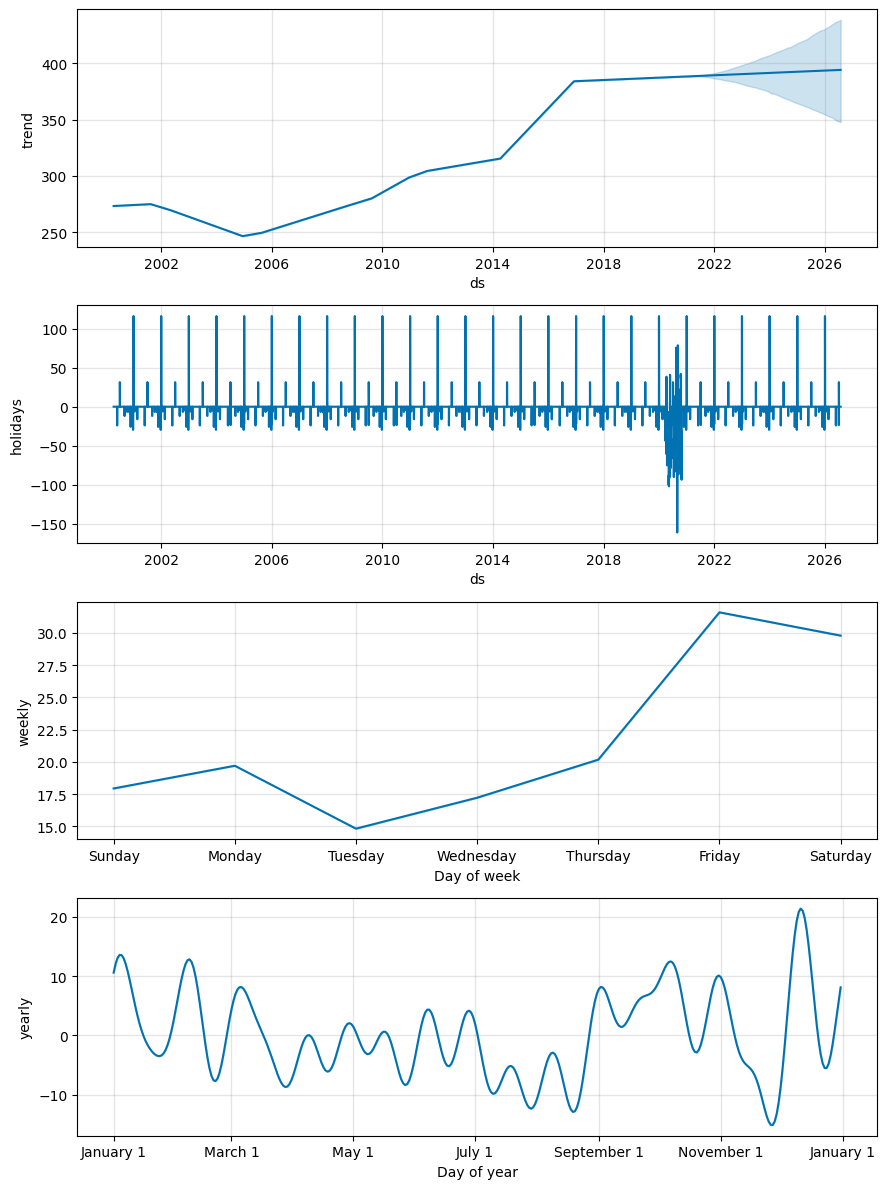

In [221]:
fig = m.plot_components(forecast)


In [175]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='366 days', period='7 days', horizon = '7 days')
df_p = performance_metrics(df_cv)
df_p.head()


  0%|          | 0/51 [00:00<?, ?it/s]

17:45:40 - cmdstanpy - INFO - Chain [1] start processing
17:45:40 - cmdstanpy - INFO - Chain [1] done processing
17:45:41 - cmdstanpy - INFO - Chain [1] start processing
17:45:41 - cmdstanpy - INFO - Chain [1] done processing
17:45:41 - cmdstanpy - INFO - Chain [1] start processing
17:45:41 - cmdstanpy - INFO - Chain [1] done processing
17:45:42 - cmdstanpy - INFO - Chain [1] start processing
17:45:42 - cmdstanpy - INFO - Chain [1] done processing
17:45:42 - cmdstanpy - INFO - Chain [1] start processing
17:45:42 - cmdstanpy - INFO - Chain [1] done processing
17:45:43 - cmdstanpy - INFO - Chain [1] start processing
17:45:43 - cmdstanpy - INFO - Chain [1] done processing
17:45:43 - cmdstanpy - INFO - Chain [1] start processing
17:45:43 - cmdstanpy - INFO - Chain [1] done processing
17:45:44 - cmdstanpy - INFO - Chain [1] start processing
17:45:44 - cmdstanpy - INFO - Chain [1] done processing
17:45:45 - cmdstanpy - INFO - Chain [1] start processing
17:45:45 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,859.593811,29.318830,23.622816,0.056502,0.050141,0.055402,0.843137
1,2 days,1361.037174,36.892237,28.694195,0.065786,0.045638,0.063960,0.705882
2,3 days,1246.222898,35.301882,26.461015,0.058668,0.042054,0.058208,0.764706
3,4 days,1007.295830,31.737924,25.775296,0.058345,0.050999,0.057577,0.764706
4,5 days,993.534576,31.520384,25.217925,0.056208,0.046070,0.055765,0.764706


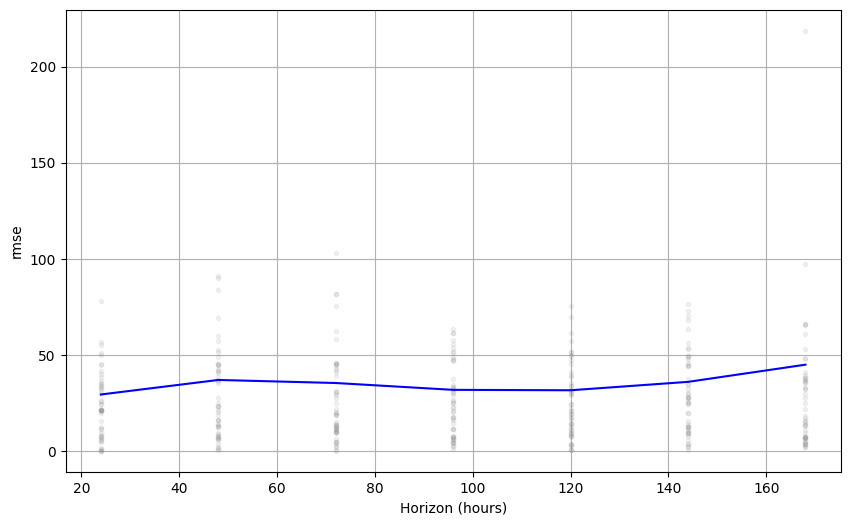

In [176]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')


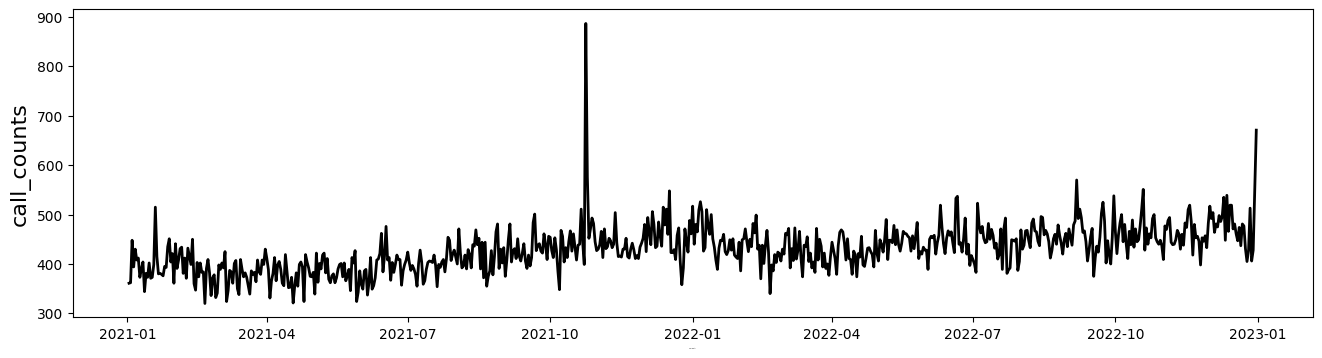

In [35]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, linewidth=2, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)
        
    plt.xlabel('Call Date', fontsize=1)
    plt.ylabel('call_counts', fontsize=16)
    plt.show()
    
    return None

x = train['Call Date'].to_numpy()
y = train['Call Number'].to_numpy()

plot_entire_series(x, y)